In [1]:
#r "nuget: SkiaSharp, 2.88.3"
#r "nuget: SkiaSharp.NativeAssets.Linux.NoDependencies, 2.88.3"

open SkiaSharp
open System



Installed Packages SkiaSharp, 2.88.3 SkiaSharp.NativeAssets.Linux.NoDependencies, 2.88.3

Loading extensions from `SkiaSharp.DotNet.Interactive.dll`

## 8 вариант

### Первая часть

In [2]:
let x0 = 201
let y0 = 305
let x1 = 428
let y1 = 358
let x2 = 371
let y2 = 215
let x3 = 143
let y3 = 20
let x4 = 305
let y4 = 82
let points = [x0, y0; x1, y1; x2, y2; x3, y3; x4, y4]


In [3]:
let rec factorial n =
    match n with
    | 0 | 1 -> 1
    | _ -> n * factorial(n - 1)

let inline combination n k = factorial n / (factorial k * factorial (n-k))   

let inline bezier pn t = 
    let n = List.length pn - 1 
    let rec aux pn k =
        match pn with
        | [] -> 0.
        | hd :: tl -> 
            (float hd) * 
            float (combination n k) * 
            Math.Pow(t, float k) *
            Math.Pow(1. - t, float n - float k) +
            aux tl (k + 1)
    aux pn 0

let inline bezierRange pn = 
    [for i in 0. .. 100. do bezier pn (i / 100.)]

let inline bezierPointsRange pn =
    let p1, p2 = List.unzip pn
    List.zip (bezierRange p1) (bezierRange p2)

In [4]:
[for i in 0 .. 3 do i]

index,value
0,0
1,1
2,2
3,3



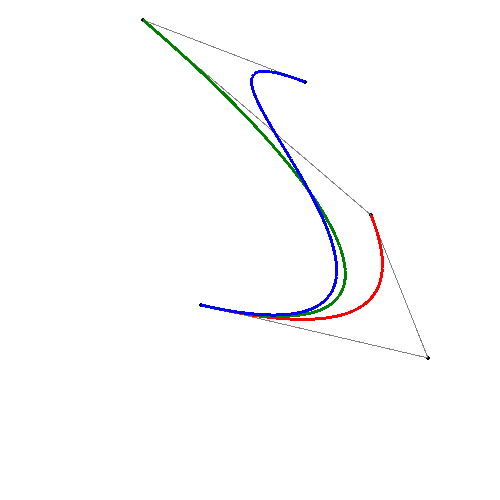

In [5]:
let secondOrderBezier = List.take 3 points |> bezierPointsRange
let thirdOrderBezier = List.take 4 points |> bezierPointsRange
let fourthOrdderBezier = List.take 5 points |> bezierPointsRange

let info = SKImageInfo(500, 500) ;
let surface = SKSurface.Create(info);
let canvas = surface.Canvas;

let inline drawLines pn color width = 
    for i in 0 .. List.length pn - 2 do
        let x1, y1 = pn[i] 
        let x2, y2 = pn[i + 1]
        canvas.DrawLine(float32 x1, float32 y1, float32 x2, float32 y2, SKPaint(Color=color, StrokeWidth=width))
canvas.Clear(SKColors.White);
for x, y in points do
    canvas.DrawCircle(float32 x, float32 y, 1.8f, SKPaint(Color=SKColors.Black))

drawLines points SKColors.Gray 1.0f

drawLines secondOrderBezier SKColors.Red 3.f
drawLines thirdOrderBezier SKColors.Green 3.f
drawLines fourthOrdderBezier SKColors.Blue 3.f
surface.Snapshot()
surface.Snapshot().Display();

### Вторая часть

In [6]:
let a1, a2 = points[3]
let b = 131.6f, 10.25f
let c = 30.f, 4.f
let d = 131.f, 215.f
let firstPoints = List.take 4 points |> List.map (fun (a1, a2) -> float32 a1, float32 a2)
let secondPoints = [float32 a1, float32 a2; b; c; d] 


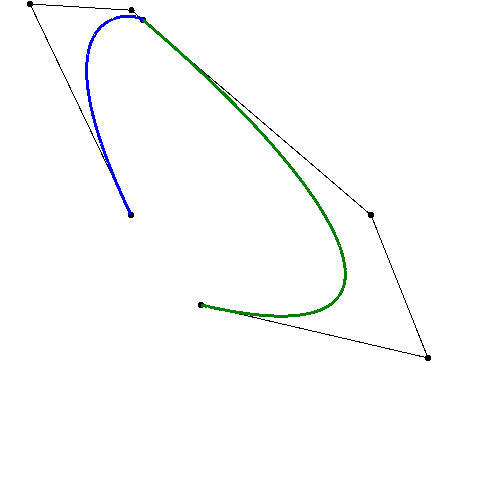

In [7]:
canvas.Clear(SKColors.White);
let points2 = firstPoints @ secondPoints
let bezier1 = bezierPointsRange firstPoints
let bezier2 = bezierPointsRange secondPoints

for x, y in points2 do
    canvas.DrawCircle(float32 x, float32 y, 3.f, SKPaint(Color=SKColors.Black))

drawLines points2 SKColors.Black 1.f
drawLines bezier1 SKColors.Green 3.f
drawLines bezier2 SKColors.Blue 3.f

surface.Snapshot().Display();
